In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
import pandas as pd

In [3]:
params = {}

In [4]:
np.random.seed(10)

In [5]:
params['lsize'] = np.arange(20,50)
np.random.shuffle(params['lsize'])

In [6]:
params['lrate'] = np.linspace(5e-5,5e-3,30)
np.random.shuffle(params['lrate'])

In [7]:
params['bsize'] = np.arange(8,128,4)
np.random.shuffle(params['bsize'])

In [8]:
params['drate'] = np.linspace(0.1,0.6,30)
np.random.shuffle(params['drate'])

In [9]:
params['deg']   = np.linspace(0,29,30)
np.random.shuffle(params['deg'])

In [10]:
df_sample = pd.read_csv('/global/homes/v/vboehm/codes/PAE/train_param_search/params_overview.csv')

In [11]:

df_sample

,level_0,lsize,lrate,bsize,drate,deg
0,0,22,0.002952,72,0.324138,8
1,1,38,0.001245,84,0.548276,25
2,2,24,0.003293,104,0.531034,29
3,3,28,0.000733,40,0.151724,20
4,4,47,0.004659,100,0.289655,12
5,5,35,0.004317,120,0.255172,16
6,6,44,0.002610,52,0.358621,13
7,7,20,0.005000,80,0.186207,0
8,8,32,0.003634,116,0.272414,21
9,9,45,0.000221,16,0.496552,26


In [12]:
df_sample['final_err'] = np.zeros(20)
df_sample['min_err'] = np.zeros(20)
df_sample['final_deriv'] = np.zeros(20)
df_sample['avg_deriv'] = np.zeros(20)

(0.09, 0.15)

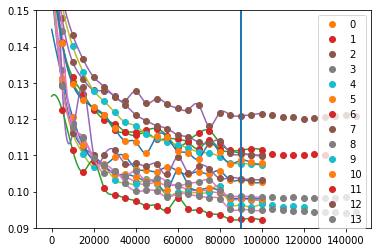

In [15]:
# use minimum between minimum and curent value+mean(deriv)*delta_step (delta_step=50000)?
for ii in range(14):
    df_1 = pd.read_csv('/global/homes/v/vboehm/codes/PAE/train_param_search/AE_sample%d.csv'%(ii+1))
    splrep = interp.splrep(df_1['Step'], df_1['Value'])
    num    = min(df_1['Step'].to_numpy()[-1],100000)
    plt.plot(np.arange(num),interp.splev(np.arange(num),splrep))
    plt.plot(df_1['Step'], df_1['Value'],ls='', marker='o',label='%d'%ii)
    deriv = interp.splev(np.arange(num),splrep,der=1)
    minimum = min(interp.splev(np.arange(num),splrep))
    df_sample.at[ii,'final_err'] = interp.splev(np.arange(num),splrep)[num-1]
    df_sample.at[ii,'min_err']   = minimum
    df_sample.at[ii,'final_deriv'] = deriv[num-1]
    df_sample.at[ii,'avg_deriv'] = np.mean(deriv[-10000::])
    plt.axvline(num-10000)
plt.legend(loc='upper right')
plt.ylim(0.09,0.15)

In [18]:
regressor = df_sample[0:14]

In [19]:
regressor

,level_0,lsize,lrate,bsize,drate,deg,final_err,min_err,final_deriv,avg_deriv
0,0,22,0.002952,72,0.324138,8,0.102721,0.102411,2.985656e-07,-5.310617e-08
1,1,38,0.001245,84,0.548276,25,0.110080,0.110045,4.417574e-08,-5.129804e-08
2,2,24,0.003293,104,0.531034,29,0.121517,0.118009,-1.154498e-08,6.115107e-08
3,3,28,0.000733,40,0.151724,20,0.097458,0.097458,-4.019075e-08,-3.736261e-08
4,4,47,0.004659,100,0.289655,12,0.096543,0.095653,1.056992e-07,2.247287e-08
5,5,35,0.004317,120,0.255172,16,0.098056,0.097986,6.683793e-08,-9.117262e-09
6,6,44,0.002610,52,0.358621,13,0.111544,0.111252,-1.820649e-07,1.247782e-08
7,7,20,0.005000,80,0.186207,0,0.103237,0.103237,-1.165275e-08,-3.351211e-08
8,8,32,0.003634,116,0.272414,21,0.098484,0.098458,1.935820e-08,-3.164173e-08
9,9,45,0.000221,16,0.496552,26,0.107465,0.107425,5.192366e-08,-2.607277e-08


In [20]:
x = regressor[['lsize ', 'lrate ', 'bsize ', 'drate ', 'deg']]#, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [21]:
x = x.to_numpy()

In [22]:
x

array([[2.20000e+01, 2.95200e-03, 7.20000e+01, 3.24138e-01, 8.00000e+00],
       [3.80000e+01, 1.24500e-03, 8.40000e+01, 5.48276e-01, 2.50000e+01],
       [2.40000e+01, 3.29300e-03, 1.04000e+02, 5.31034e-01, 2.90000e+01],
       [2.80000e+01, 7.33000e-04, 4.00000e+01, 1.51724e-01, 2.00000e+01],
       [4.70000e+01, 4.65900e-03, 1.00000e+02, 2.89655e-01, 1.20000e+01],
       [3.50000e+01, 4.31700e-03, 1.20000e+02, 2.55172e-01, 1.60000e+01],
       [4.40000e+01, 2.61000e-03, 5.20000e+01, 3.58621e-01, 1.30000e+01],
       [2.00000e+01, 5.00000e-03, 8.00000e+01, 1.86207e-01, 0.00000e+00],
       [3.20000e+01, 3.63400e-03, 1.16000e+02, 2.72414e-01, 2.10000e+01],
       [4.50000e+01, 2.21000e-04, 1.60000e+01, 4.96552e-01, 2.60000e+01],
       [4.20000e+01, 1.75700e-03, 3.20000e+01, 4.62069e-01, 3.00000e+00],
       [4.00000e+01, 3.46400e-03, 8.80000e+01, 1.68966e-01, 4.00000e+00],
       [4.30000e+01, 3.91000e-04, 8.00000e+00, 4.79310e-01, 1.00000e+01],
       [4.90000e+01, 3.12200e-03, 6.80

In [23]:
x[np.where(x==0)]=1e-9

In [24]:
x = np.log(x)

In [25]:
x

array([[  3.09104245,  -5.82527237,   4.27666612,  -1.12658593,
          2.07944154],
       [  3.63758616,  -6.68861975,   4.4308168 ,  -0.60097647,
          3.21887582],
       [  3.17805383,  -5.71595628,   4.6443909 ,  -0.63292923,
          3.36729583],
       [  3.33220451,  -7.21836486,   3.68887945,  -1.8856922 ,
          2.99573227],
       [  3.8501476 ,  -5.36895445,   4.60517019,  -1.23906472,
          2.48490665],
       [  3.55534806,  -5.44519456,   4.78749174,  -1.36581745,
          2.77258872],
       [  3.78418963,  -5.94840506,   3.95124372,  -1.02548916,
          2.56494936],
       [  2.99573227,  -5.29831737,   4.38202663,  -1.68089632,
        -20.72326584],
       [  3.4657359 ,  -5.61742131,   4.75359019,  -1.30043231,
          3.04452244],
       [  3.80666249,  -8.41734786,   2.77258872,  -0.70006707,
          3.25809654],
       [  3.73766962,  -6.34414747,   3.4657359 ,  -0.77204105,
          1.09861229],
       [  3.68887945,  -5.66533129,   4.477

In [102]:
y = #, 'final_err','min_err', 'final_deriv', 'avg_deriv']]

In [130]:
y = regressor[['final_err']].to_numpy()+1e5*regressor[['avg_deriv']].to_numpy()

In [131]:
y = np.log(y)
y

array([[-2.32881913],
       [-2.25427408],
       [-2.05860303],
       [-2.36742359],
       [-2.31475745],
       [-2.33156146],
       [-2.18221053],
       [-2.30373009],
       [-2.35051966],
       [-2.25514853],
       [-2.31362771],
       [-2.41129874],
       [-2.2402283 ],
       [-2.38510053]])

In [132]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


kernel = C(1.0, (1e-4, 1e4)) * RBF(1, (1e-4, 1e4))
#Instanciate a Gaussian Process model
gp     = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
print(gp)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


In [133]:
# fit on averages of full rescaled set
gp.fit(x,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [134]:
gp.predict([[np.log(40),  -5.82527237,   4.27666612,  -1.12658593,
          2.07944154]])

array([[-2.37562023]])

In [135]:
np.hstack(([[40]],[[1,2,3]]))

array([[40,  1,  2,  3]])

In [136]:
from scipy.optimize import minimize

In [137]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-2, 16, 0.1, 1]), method='Nelder-Mead')

In [146]:
np.exp(res['x']), res['fun'], res['success']

(array([1.64550514e-03, 1.59549687e+02, 3.33337881e-01, 3.01990189e+00]),
 -2.6711340944337634,
 True)

In [147]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-3, 32, 0.4, 20]), method='Nelder-Mead')

In [148]:
np.exp(res['x']), res['fun'], res['success']

(array([1.64550514e-03, 1.59549687e+02, 3.33337881e-01, 3.01990189e+00]),
 -2.6711340944337634,
 True)

In [149]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-3, 32, 0.4, 20]), method='COBYLA')

In [150]:
np.exp(res['x']), res['fun'], res['success']

(array([1.22798998e-03, 2.98710315e+02, 1.50212482e-01, 9.24223058e+01]),
 -2.8107036995835846,
 True)

In [156]:
res = minimize(fun= lambda x: gp.predict(np.hstack(([[np.log(40)]],[x]))), x0=np.log([1e-03, 256,0.15, 10]), method='Nelder-Mead')

In [157]:
np.exp(res['x']), res['fun'], res['success']

(array([1.22790087e-03, 2.98721317e+02, 1.50215902e-01, 9.24118914e+01]),
 -2.8107037024981048,
 True)